In [13]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

def empirical_wasserstein_distance(X, Y, p=2):
    """
    Compute the empirical Wasserstein distance of order p between two 2D datasets X and Y.
    
    Parameters:
        X (np.ndarray): Array of shape (n, 2)
        Y (np.ndarray): Array of shape (n, 2)
        p (float): The order of the Wasserstein distance (default is 2)
    
    Returns:
        float: The Wasserstein distance W_p(X, Y)
    """
    if X.shape != Y.shape:
        raise ValueError("Both datasets must have the same shape.")
    
    n = X.shape[0]

    # Compute the pairwise distance matrix with order p
    cost_matrix = cdist(X, Y, metric='minkowski', p=p) ** p

    # Find the optimal assignment (Hungarian algorithm)
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Compute the average cost of the optimal assignment
    total_cost = cost_matrix[row_ind, col_ind].sum()

    # Return the p-th root of the average cost
    return (total_cost / n) ** (1 / p)

# Example datasets
np.random.seed(0)  # For reproducibility
# X = np.random.rand(100, 2)
# Y = np.random.rand(100, 2)

X = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
Y = np.random.randn(100, 2)

distance = empirical_wasserstein_distance(X, Y, p=2)
print(f"Wasserstein distance (p=2): {distance:.4f}")


Wasserstein distance (p=2): 3.1314


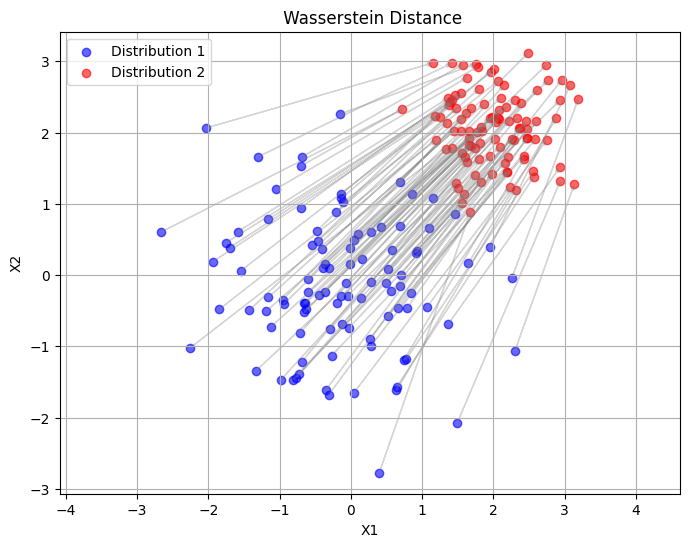

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

def empirical_wasserstein_distance(X, Y, p=2):
    if X.shape != Y.shape:
        raise ValueError("Both datasets must have the same shape.")
    
    n = X.shape[0]
    cost_matrix = cdist(X, Y, metric='minkowski', p=p) ** p
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    total_cost = cost_matrix[row_ind, col_ind].sum()
    return (total_cost / n) ** (1 / p), row_ind, col_ind

# Generate synthetic 2D datasets
np.random.seed(0)
# X = np.random.randn(100, 2) * 0.5 + np.array([2, 2])  # Target distribution
# Y = np.random.randn(100, 2)                          # Source distribution

# Compute distance and assignment
distance, row_ind, col_ind = empirical_wasserstein_distance(X, Y, p=2)

# Plot the transformation
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c='blue', label='Distribution 1', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c='red', label='Distribution 2', alpha=0.6)

# Draw arrows from Y to assigned X
for i, j in zip(row_ind, col_ind):
    plt.arrow(Y[j, 0], Y[j, 1], X[i, 0] - Y[j, 0], X[i, 1] - Y[j, 1],
              color='gray', alpha=0.3, head_width=0.05, length_includes_head=True)

plt.title(f" Wasserstein Distance")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


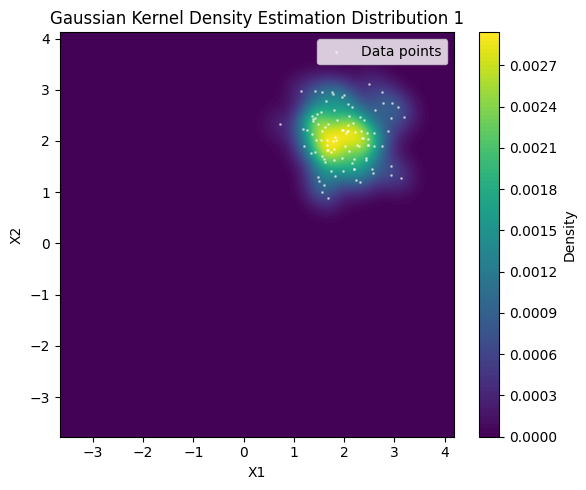

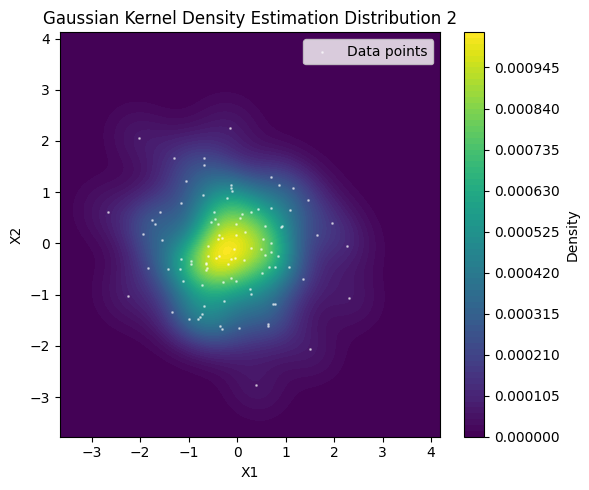

np.float64(2.8424327672651764)

In [28]:
from scipy.stats import gaussian_kde

## find boundaries
x1_max, x2_max = np.max(X, axis = 0)+1
y1_max, y2_max = np.max(Y, axis = 0)+1
x1_min, x2_min = np.min(X, axis = 0)-1
y1_min, y2_min = np.min(Y, axis = 0)-1

X1_min = np.min([x1_min,y1_min])
X1_max = np.max([x1_max,y1_max])
X2_min = np.min([x2_min,y2_min])
X2_max = np.max([x2_max,y2_max])

num_points = 100

x1_Dim_range = np.linspace(X1_min, X1_max, num_points)
x2_Dim_range = np.linspace(X2_min, X2_max, num_points)

## create meshgrid
X1_grid, X2_grid = np.meshgrid(x1_Dim_range, x2_Dim_range)
grid_coords = np.vstack([X1_grid.ravel(), X2_grid.ravel()]).T

## estimate 2D KDEs
kde_X = gaussian_kde(X.T)
kde_Y = gaussian_kde(Y.T)

## compute density at each grid point
Z_X = kde_X(grid_coords.T)
Z_Y = kde_Y(grid_coords.T)

# Normalize to form probability distributions (sum to 1)
Z_X /= Z_X.sum()
Z_Y /= Z_Y.sum()

## Reshape Z for plotting
Z_X = Z_X.reshape(X1_grid.shape)
Z_Y = Z_Y.reshape(X1_grid.shape)

## Plot the estimated density
plt.figure(figsize=(6,5))
plt.contourf(X1_grid, X2_grid, Z_X, levels=100, cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(X[:, 0], X[:, 1], s=1, color='white', alpha=0.5, label='Data points')
plt.title("Gaussian Kernel Density Estimation Distribution 1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.tight_layout()
plt.show()

## Plot the estimated density
plt.figure(figsize=(6, 5))
plt.contourf(X1_grid, X2_grid, Z_Y, levels=100, cmap='viridis')
plt.colorbar(label='Density')
plt.scatter(Y[:, 0], Y[:, 1], s=1, color='white', alpha=0.5, label='Data points')
plt.title("Gaussian Kernel Density Estimation Distribution 2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.tight_layout()
plt.show()


## Calculate the step size for each dimension
dX1 = (X1_max - X1_min) / num_points
dX2 = (X2_max - X2_min) / num_points

## Create cumulative distribution functions (CDFs)
Z_cdf_X = Z_X.cumsum(axis=0).cumsum(axis=1)
Z_cdf_Y = Z_Y.cumsum(axis=0).cumsum(axis=1)

## Calculate distance
dist =  (np.sum((Z_cdf_X - Z_cdf_Y)**2 *dX1*dX2))**(1/2) ## sum of the volumes that are created by the difference of the two CDFs
dist



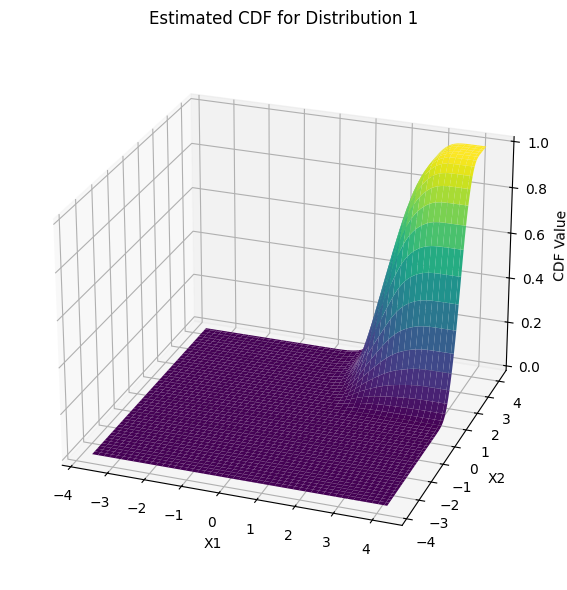

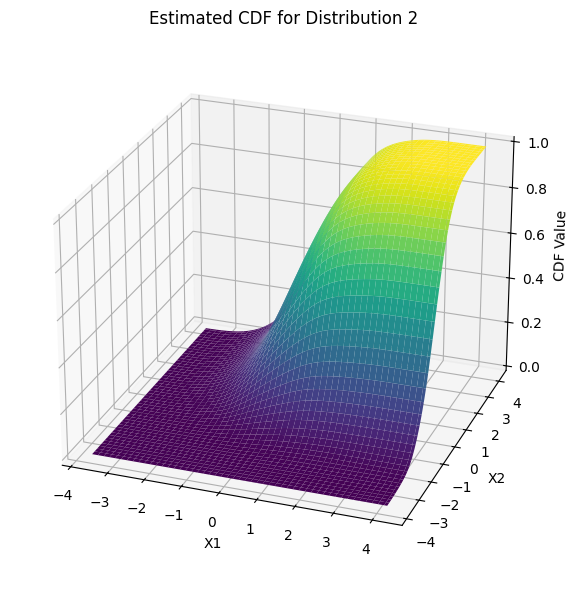

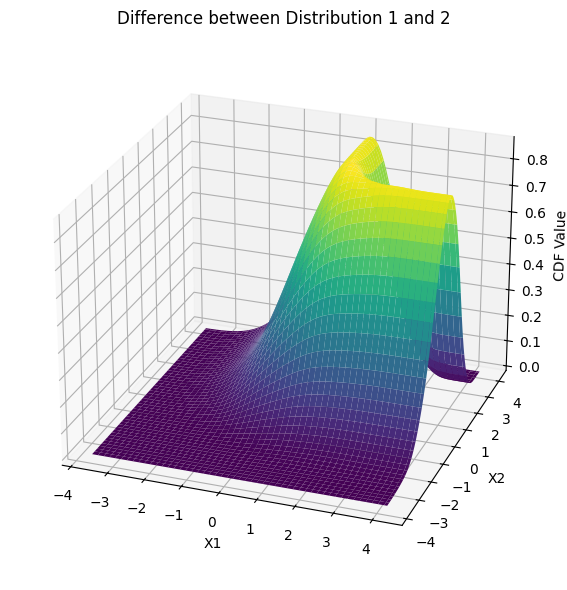

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create meshgrid for 3D plotting
X1_mesh, X2_mesh = np.meshgrid(np.linspace(X1_min, X1_max, num_points),
                               np.linspace(X2_min, X2_max, num_points))

# Plot CDF for X
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1_mesh, X2_mesh, Z_cdf_X, cmap=cm.viridis, edgecolor='none')
ax.set_title("Estimated CDF for Distribution 1")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("CDF Value")
#fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.view_init(elev=25, azim=290, roll=0)
plt.tight_layout()
plt.show()

# Plot CDF for Y
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1_mesh, X2_mesh, Z_cdf_Y, cmap=cm.viridis, edgecolor='none')
ax.set_title("Estimated CDF for Distribution 2")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("CDF Value")
#fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.view_init(elev=25, azim=290, roll=0)
plt.tight_layout()
plt.show()

# Plot CDF for diff
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1_mesh, X2_mesh, Z_cdf_Y - Z_cdf_X, cmap=cm.viridis, edgecolor='none')
ax.set_title("Difference between Distribution 1 and 2")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("CDF Value")
#fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.view_init(elev=25, azim=290, roll=0)
plt.tight_layout()
plt.show()


In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
# from scipy.stats import wasserstein_distance

# # Generate synthetic 2D datasets
# np.random.seed(0)
# # X = np.random.randn(100, 2) * 0.5 + np.array([2, 2])
# # Y = np.random.randn(100, 2)

# # Estimate 2D KDEs
# kde_X = gaussian_kde(X.T)
# kde_Y = gaussian_kde(Y.T)

# # Define a grid over the 2D space
# xmin = min(X[:,0].min(), Y[:,0].min()) - 1
# xmax = max(X[:,0].max(), Y[:,0].max()) + 1
# ymin = min(X[:,1].min(), Y[:,1].min()) - 1
# ymax = max(X[:,1].max(), Y[:,1].max()) + 1

# grid_size = 100
# x_grid = np.linspace(xmin, xmax, grid_size)
# y_grid = np.linspace(ymin, ymax, grid_size)
# X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
# grid_coords = np.vstack([X_grid.ravel(), Y_grid.ravel()])

# # Evaluate KDEs on the grid
# Z_X = kde_X(grid_coords)
# Z_Y = kde_Y(grid_coords)

# # Normalize to form probability distributions (sum to 1)
# Z_X /= Z_X.sum()
# Z_Y /= Z_Y.sum()

# # Compute approximate Wasserstein distance
# # Since scipy's wasserstein_distance only supports 1D, we approximate in 2D manually:
# from scipy.optimize import linear_sum_assignment
# from scipy.spatial.distance import cdist

# # Use cost matrix (Euclidean distances between grid points)
# #cost_matrix = cdist(grid_coords.T, grid_coords.T)
# emd_matrix =  np.abs(Z_X[:, None] - Z_Y[None, :])# cost_matrix *
# emd_distance = emd_matrix.sum()  # approximate EMD

# print(f"Approximate Wasserstein Distance (via KDE): {emd_distance:.4f}")


In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
# import ot  # POT library

# # Generate synthetic 2D datasets
# np.random.seed(0)
# X = np.random.randn(10000, 2) * 0.5 + np.array([2, 2])
# Y = np.random.randn(10000, 2)

# # Estimate 2D KDEs
# kde_X = gaussian_kde(X.T)
# kde_Y = gaussian_kde(Y.T) 

# # Create a common 2D grid
# grid_size = 50
# x_grid = np.linspace(min(X[:, 0].min(), Y[:, 0].min()) - 1, max(X[:, 0].max(), Y[:, 0].max()) + 1, grid_size)
# y_grid = np.linspace(min(X[:, 1].min(), Y[:, 1].min()) - 1, max(X[:, 1].max(), Y[:, 1].max()) + 1, grid_size)
# X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
# grid_coords = np.vstack([X_grid.ravel(), Y_grid.ravel()])

# # Evaluate the KDEs over the grid
# density_X = kde_X(grid_coords)
# density_Y = kde_Y(grid_coords)

# # Normalize to sum to 1 (to represent valid probability distributions)
# density_X /= density_X.sum()
# density_Y /= density_Y.sum()

# # Define the cost matrix (squared Euclidean distances between grid points)
# M = ot.dist(grid_coords.T, grid_coords.T)
# M /= M.max()  # optional: normalize for numerical stability

# # Compute Wasserstein distance using POT
# emd_distance = ot.emd2(density_X, density_Y, M)

# print(f"Approximate Wasserstein Distance (via KDE + POT): {emd_distance:.4f}")


In [23]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
# import ot  # POT library

# # Generate synthetic 2D datasets
# np.random.seed(0)
# X = np.random.randn(1000, 2) * 0.5 + np.array([2, 2])
# Y = np.random.randn(1000, 2)

# # Estimate 2D KDEs
# kde_X = gaussian_kde(X.T)
# kde_Y = gaussian_kde(Y.T)

# # Create a grid for density evaluation
# grid_size = 50  # Grid size
# x_grid = np.linspace(min(X[:, 0].min(), Y[:, 0].min()) - 1, max(X[:, 0].max(), Y[:, 0].max()) + 1, grid_size)
# y_grid = np.linspace(min(X[:, 1].min(), Y[:, 1].min()) - 1, max(X[:, 1].max(), Y[:, 1].max()) + 1, grid_size)
# X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
# grid_coords = np.vstack([X_grid.ravel(), Y_grid.ravel()])

# # Evaluate the KDEs over the grid
# density_X = kde_X(grid_coords)
# density_Y = kde_Y(grid_coords)

# # Normalize densities so they sum to 1 (proper probability distribution)
# density_X /= density_X.sum()
# density_Y /= density_Y.sum()

# # Define the cost matrix (squared Euclidean distances between grid points)
# M = ot.dist(grid_coords.T, grid_coords.T)
# M /= M.max()  # Optional normalization for numerical stability

# # Sinkhorn Distance (faster with entropic regularization)
# epsilon = 0.05  # Regularization parameter (lower epsilon for closer match to true Wasserstein)
# emd_distance_sinkhorn = ot.sinkhorn(density_X, density_Y, M, epsilon)

# print(f"Optimized Wasserstein Distance (Sinkhorn): {emd_distance_sinkhorn:.4f}")
